<a href="https://colab.research.google.com/github/ANAGHA-20/helloGithub/blob/main/AnnVSCnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
classes=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','truck','ship']


In [3]:
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [7]:
y_train = y_train.reshape(-1,)
x_train[6]

array([[[164, 206,  84],
        [105, 140,  61],
        [118, 148, 101],
        ...,
        [109, 147,  73],
        [108, 147,  69],
        [ 91, 129,  57]],

       [[167, 213,  84],
        [116, 160,  49],
        [ 72, 109,  43],
        ...,
        [105, 142,  79],
        [105, 142,  72],
        [ 89, 127,  57]],

       [[140, 191,  65],
        [142, 193,  66],
        [119, 163,  79],
        ...,
        [104, 139,  84],
        [ 84, 120,  58],
        [ 78, 115,  49]],

       ...,

       [[139, 148,  81],
        [142, 155,  74],
        [135, 156,  72],
        ...,
        [ 89, 134,  28],
        [ 97, 148,  24],
        [126, 176,  49]],

       [[163, 157,  85],
        [153, 164,  82],
        [146, 164,  90],
        ...,
        [ 85, 130,  19],
        [ 98, 148,  27],
        [127, 178,  48]],

       [[183, 153, 102],
        [176, 182, 116],
        [154, 154, 100],
        ...,
        [ 94, 134,  29],
        [ 91, 133,  26],
        [122, 170,  44]]

In [5]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

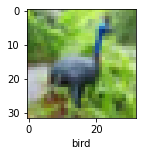

In [8]:
plot_sample(x_train, y_train, 6)

In [ ]:
x_train, x_test = x_train/255, x_test/255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation= 'relu'),
    layers.Dense(1000, activation= 'relu'),
    layers.Dense(10, activation= 'softmax')
])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 5)


Epoch 1/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.8122 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.6236 - accuracy: 0.4285
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5437 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 98s 62ms/step - loss: 1.4832 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4323 - accuracy: 0.4962


In [ ]:
y_pred1 = ann.predict(x_test)
y_pred_classes1 = [np.argmax(element) for element in y_pred]

print("classification report : \n", classification_report(y_test,y_pred_classes))

classification report : 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      1000
           1       0.77      0.87      0.82      1000
           2       0.53      0.63      0.58      1000
           3       0.54      0.45      0.49      1000
           4       0.67      0.60      0.63      1000
           5       0.62      0.64      0.63      1000
           6       0.77      0.80      0.78      1000
           7       0.74      0.79      0.76      1000
           8       0.79      0.80      0.80      1000
           9       0.89      0.68      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
cnn = models.Sequential([
                        layers.Conv2D(filters=32, kernel_size=(3, 3), activation = 'relu', input_shape = (32, 32, 3)),
                        layers.MaxPooling2D((2,2)),

                        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                        layers.MaxPooling2D((2,2)),

                        layers.Flatten(),
                        layers.Dense(64, activation='relu'),
                        layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4782 - accuracy: 0.4687
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1043 - accuracy: 0.6125
Epoch 3/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.9699 - accuracy: 0.6624
Epoch 4/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.8811 - accuracy: 0.6916
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8080 - accuracy: 0.7182
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7505 - accuracy: 0.7377
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6973 - accuracy: 0.7560
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6523 - accuracy: 0.7722
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6045 - accuracy: 0.7906
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9517 - accuracy: 0.6924


[0.951682984828949, 0.6923999786376953]

In [ ]:
y_pred2 = cnn.predict(x_test)
y_pred_classes2 = [np.argmax(element) for element in y_pred]

print("classification report : \n", classification_report(y_test,y_pred_classes))

classification report : 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      1000
           1       0.77      0.87      0.82      1000
           2       0.53      0.63      0.58      1000
           3       0.54      0.45      0.49      1000
           4       0.67      0.60      0.63      1000
           5       0.62      0.64      0.63      1000
           6       0.77      0.80      0.78      1000
           7       0.74      0.79      0.76      1000
           8       0.79      0.80      0.80      1000
           9       0.89      0.68      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

